https://github.com/pmneila/morphsnakes

## **i. Mount google drive**
---

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## **ii. Import the libraries**
---

In [ ]:
import cv2
import sys
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

print("Versions of key libraries")
print("---")
print("cv2:       ", cv2.__version__)
print("numpy:     ", np.__version__)
print("matplotlib:", matplotlib.__version__)


Versions of key libraries
---
cv2:        4.1.2
numpy:      1.19.5
matplotlib: 3.2.2


## **iii. Append /iss/vse/data/ in your python path**
---

In [ ]:
sys.path.append('/content/gdrive/My Drive/iss/vse/data/')
print("All the system paths:")
sys.path

All the system paths:


['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/iss/vse/data/']

## **iv. Change working directory to /iss/vse/data/**
---

In [ ]:
os.chdir('/content/gdrive/My Drive/iss/vse/data/')
print("Current working directory:")
os.getcwd()

Current working directory:


'/content/gdrive/My Drive/iss/vse/data'

## **v. Define `cv2plt` for image display**
---

In [ ]:
def cv2plt(img):
    plt.figure(figsize=(7,7))        # To change the size of figure
    plt.axis('off')
    if np.size(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)  
    plt.show()

print(cv2plt)

<function cv2plt at 0x7fb82addbcb0>


## **Example on ultrasound image**
---


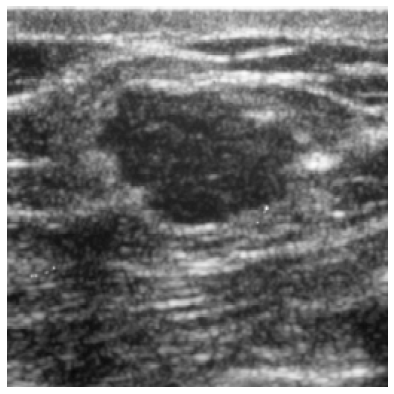

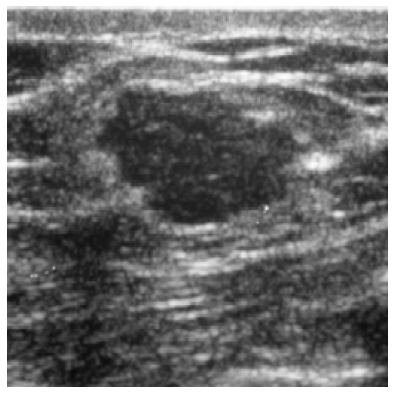

In [ ]:
import morphsnakes as ms

# Read in image, turn it into grayscale
mam      = cv2.imread('mama07ORI.bmp')
cv2plt(mam)

# transform the value to 0 to 1 
mam      = mam[:,:,0]/255.0
cv2plt(mam*255)

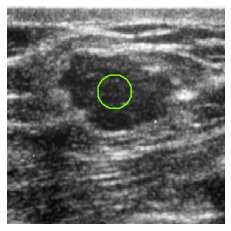

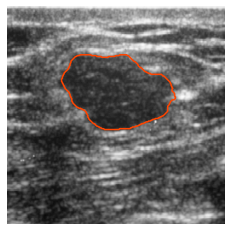

In [ ]:
# Create inverse gaussian gradient
invg     = ms.inverse_gaussian_gradient(mam, alpha=1000, sigma=5.48)
    
# Create the initial level set, a circle
ls0      = ms.circle_level_set(mam.shape, (100, 126), 20)

# Create the callback for visual display
callback = ms.visual2d(mam)

# Run the segmentation using geodesic active contour
lsf      = ms.morphological_geodesic_active_contour(invg, 
                                                    iterations=45, 
                                                    init_level_set=ls0,
                                                    smoothing=1, 
                                                    threshold=0.31,
                                                    balloon=1, 
                                                    iter_callback=callback)

# mam is a 2D array with values range from 0~1, so
# to plot it correctly, we need to specify the
# correct vmin and vmax
plt.imshow(mam,cmap='gray',vmin=0,vmax=1)


# Draw the contour on the segmentation output and
# superimpose the contour on the 'mam' image
# [0.5] is the level of height in 'lsf' for the contour to draw upon
plt.contour(lsf, [0.5], colors='orangered')
plt.axis('off')
plt.show()

 The minimum value in lsf is 0
 The maximum value in lsf is 1



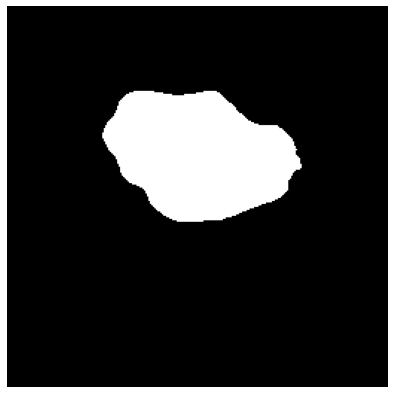

In [ ]:
# Check the minimum and maximum value of the segmentation output 'lsf'
print(" The minimum value in lsf is", lsf.min())
print(" The maximum value in lsf is", lsf.max())
print("")

# Display the 'lsf' output
cv2plt(lsf*255)

## **Example on image of lakes**
---


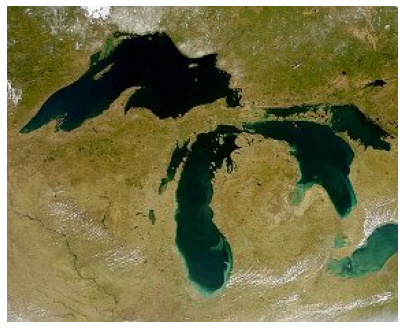

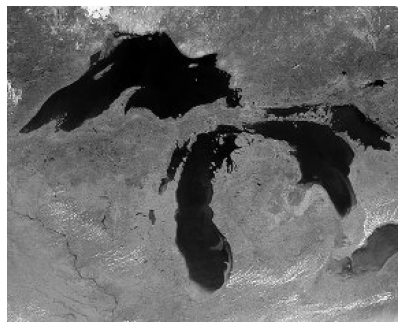

In [ ]:
# Read in image, turn it into grayscale                                
lak      = cv2.imread('lakes3.jpg')
cv2plt(lak)

# transform the value to 0 to 1
lakg     = cv2.cvtColor(lak,cv2.COLOR_BGR2GRAY) / 255.0
cv2plt(lakg*255)

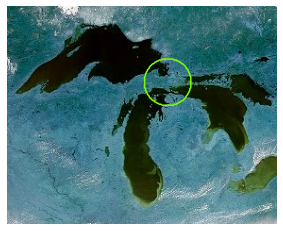

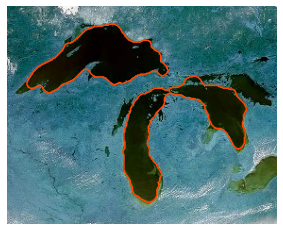

In [ ]:
# For chan vase algorithm, no need to create
# inverse gaussian gradient, so
# just create the initial level set, a circle
ls0      = ms.circle_level_set(lakg.shape, (80, 170), 25)
    
# Create the callback for visual display
callback = ms.visual2d(lak)

# Run the segmentation using 
# chan vese
lsf      = ms.morphological_chan_vese(lakg, 
                                      iterations=200,
                                      init_level_set=ls0,
                                      smoothing=3, 
                                      lambda1=1, 
                                      lambda2=1,
                                      iter_callback=callback)

# plot the original lake image
# Do take note, because the image is read
# using cv2.imread() (get BGR colour) and displayed 
# using plt.imshow() (expect RGB colour), the colour
# of the image is not displayed correctly
plt.imshow(lak)


# Draw the contour on the segmentation output and
# superimpose the contour on the 'lak' image
# [0.5] is the level of height in 'lsf' for the 
# contour to draw upon
plt.contour(lsf, [0.5], colors='orangered') 
plt.axis('off')
plt.show()

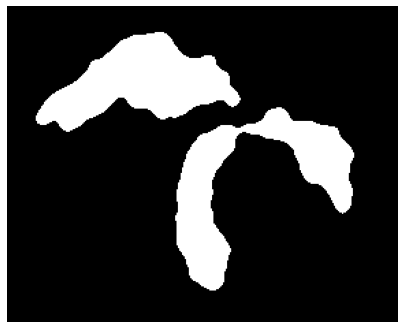

In [ ]:
# Display the 'lsf' output
cv2plt(lsf*255)

## **Example on image of neurophilis**
---

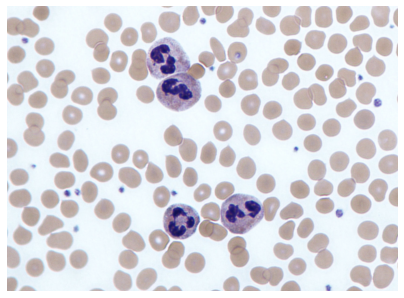

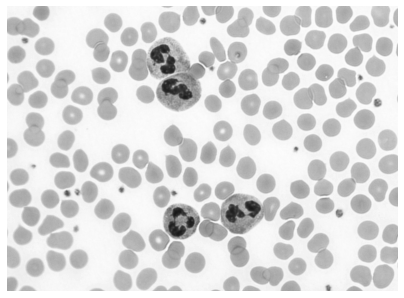

In [ ]:
# Read in image, resize the image, make it smaller
# For demonstration purpose, we use smaller image
# It takes less time to compute
neu     = cv2.imread('neu.jpg')
neu     = cv2.resize(neu,(728,530),interpolation=cv2.INTER_LINEAR)
cv2plt(neu)

# turn it into grayscale,
# transform the value to 0 to 1
neug    = cv2.cvtColor(neu,cv2.COLOR_BGR2GRAY)/255.0 
cv2plt(neug*255)

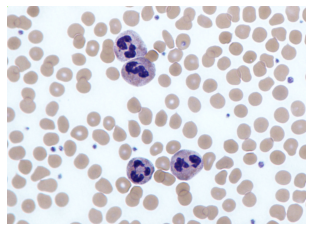

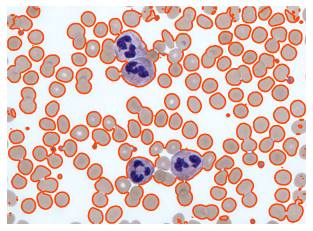

In [ ]:
# Create inverse gaussian gradient
invg    = ms.inverse_gaussian_gradient(neug, alpha=700, sigma=1)

# Create the initial level set, a circle
ls0     = ms.circle_level_set(neug.shape, (265, 364), 450)

# Create the callback for visual display
callback = ms.visual2d(cv2.cvtColor(neu,cv2.COLOR_BGR2RGB))

# Run the segmentation using geodesic
# active contour
# Note: This may take sometime
lsf      = ms.morphological_geodesic_active_contour(invg, 
                                                    iterations=400, 
                                                    init_level_set=ls0,
                                                    smoothing=1, 
                                                    threshold=0.5,   # higher threshold is needed to get contour to stick on weak border
                                                    balloon=-1, 
                                                    iter_callback=callback)


plt.imshow(cv2.cvtColor(neu,cv2.COLOR_BGR2RGB))


# Draw the contour on the segmentation output and
# superimpose the contour on the 'neu' image
# [0.5] is the level of height in 'lsf' for the 
# contour to draw upon
plt.contour(lsf, [0.5], colors='orangered') 
plt.axis('off')
plt.show()

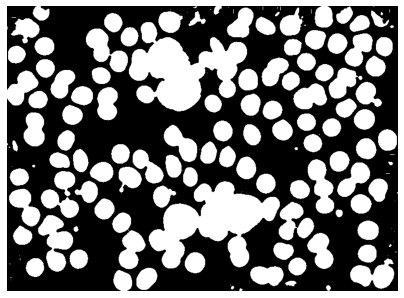

In [ ]:
# Display the 'lsf' output
cv2plt(lsf*255)